## Inverse problems in image processing - TD 1
                                  
                                  e-mail: jayousi@unice.fr
                                  date: 12th Jan. 2024

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Introduction

## 1.1 Fourier Transform

Load and display the two images.

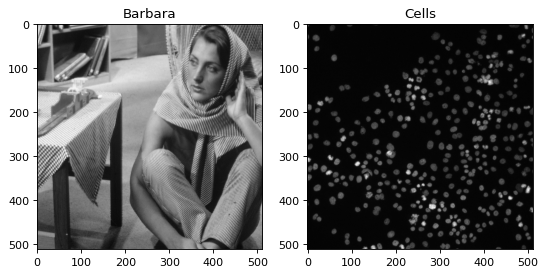

In [4]:
def scale(img):
    return ((img - img.min())/(img.max() - img.min()) * 255)

# load the images
x1 = np.float64(plt.imread('barbara.png'))
x2 = np.float64(plt.imread('cells.png'))

# rescale the images in the range 0-255
x1 = scale(x1)
x2 = scale(x2)

# plot the images
plt.figure(figsize=(8, 4), dpi=80)
plt.subplot(121)
plt.imshow(x1, cmap='gray')
plt.title('Barbara')
plt.subplot(122)
plt.imshow(x2, cmap='gray')
plt.title('Cells')
plt.show()

Using the FFT (Fast Fourier Transform) compute the magnitude and phase spectrum of the two images.

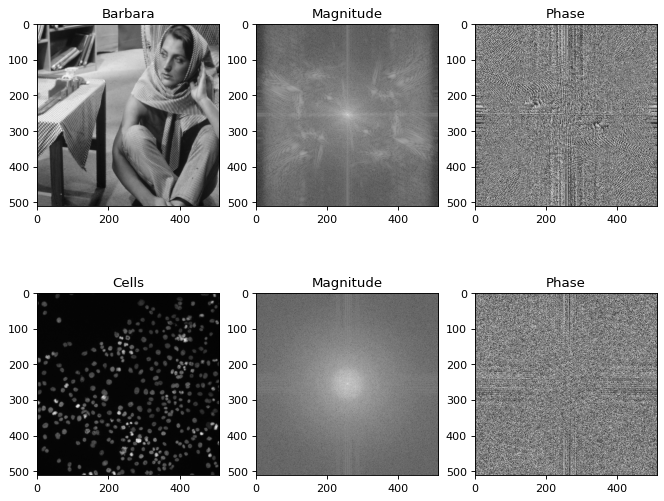

In [5]:
xf1 = np.fft.fft2(x1)
xm1 = np.log(np.abs(np.fft.fftshift(xf1)) + 1e-1)
xp1 = np.angle(np.fft.fftshift(xf1))
xf2 = np.fft.fft2(x2)
xm2 = np.log(np.abs(np.fft.fftshift(xf2)) + 1e-1)
xp2 = np.angle(np.fft.fftshift(xf2))

plt.figure(figsize=(10, 8), dpi=80)
plt.subplot(231)
plt.imshow(x1, cmap='gray')
plt.title('Barbara')
plt.subplot(232)
plt.imshow(xm1, cmap='gray')
plt.title('Magnitude')
plt.subplot(233)
plt.imshow(xp1, cmap='gray')
plt.title('Phase')
plt.subplot(234)
plt.imshow(x2, cmap='gray')
plt.title('Cells')
plt.subplot(235)
plt.imshow(xm2, cmap='gray')
plt.title('Magnitude')
plt.subplot(236)
plt.imshow(xp2, cmap='gray')
plt.title('Phase')
plt.show()

Then combine the magnitude spectrum of one image with the phase spectrum of the other and vice versa. What do you observe?

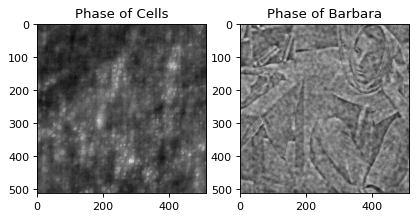

In [6]:
comb_im1 = np.multiply(np.abs(xf1), np.exp(1j*np.angle(xf2)))
comb_im1 = np.real(np.fft.ifft2(comb_im1))
comb_im2 = np.multiply(np.abs(xf2), np.exp(1j*np.angle(xf1)))
comb_im2 = np.real(np.fft.ifft2(comb_im2))

plt.figure(figsize=(6, 4), dpi=80)
plt.subplot(121)
plt.imshow(comb_im1, cmap='gray')
plt.title('Phase of Cells')
plt.subplot(122)
plt.imshow(comb_im2, cmap='gray')
plt.title('Phase of Barbara')
plt.show()

## 1.2 Noise Generation

Add noise, $\eta$, to the "Barbara" image where

$$\eta \sim \mathcal{N}(0, \sigma^2 I)$$

Plot the original and the noisy image.  

_Hint_: you can use the np.random.randn() function

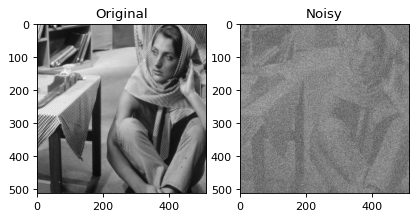

In [7]:
sig = 150                     # SD of Gaussien noise
x1_n = x1 + sig*np.random.randn(*np.shape(x1))

plt.figure(figsize=(6, 4), dpi=80)
plt.subplot(121)
plt.imshow(x1, cmap='gray')
plt.title('Original')
plt.subplot(122)
plt.imshow(x1_n, cmap='gray')
plt.title('Noisy')
plt.show()

To quantify the strength of the original image $x_o$ in comparison to its noisy counterpart $x_n$, we use the Signal-to-Noise Ratio (SNR) measure, defined as:

$$ \text{SNR}(x_o,x_n) = 20\log_{10} {\frac{ \|x_o\| }{ \|x_o-x_n\| } } $$ 

It is a quantity expressed in decibels (dB). The higher the SNR, the better the signal quality.

Compute the SNR between "Barbara" and its noisy version, for different noise levels (different $\sigma$). What do you observe?

In [8]:
snr = lambda xref, x: 20 * np.log10(np.linalg.norm(xref) / np.linalg.norm(xref - x))
print(f'SNR = {np.round(snr(x1, x1_n), 3)} dB')

SNR = -1.306 dB


Add Poisson noise to the "Barbara" image. The Poisson noise is signal dependenent and is generated from the data instead of being added. Plot the original and the noisy image. 

_Hint_: you can use the np.random.poisson() function

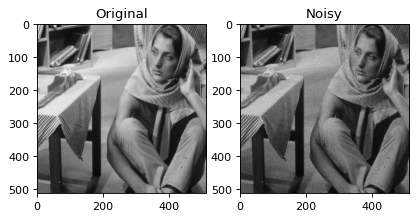

SNR = 21.628 dB


In [9]:
x1_p = np.random.poisson(x1)

plt.figure(figsize=(6, 4), dpi=80)
plt.subplot(121)
plt.imshow(x1, cmap='gray')
plt.title('Original')
plt.subplot(122)
plt.imshow(x1_p, cmap='gray')
plt.title('Noisy')
plt.show()


print(f'SNR = {np.round(snr(x1, x1_p), 3)} dB')

Change the image brightness of the image and compute the SNR. What do you observe?

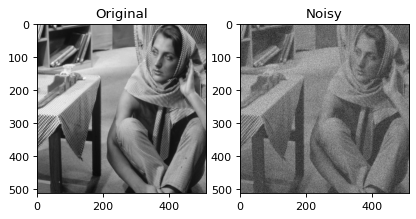

SNR = 2.812 dB


In [10]:
x1_p = np.random.poisson(x1/255*100 + 155)

plt.figure(figsize=(6, 4), dpi=80)
plt.subplot(121)
plt.imshow(x1, cmap='gray')
plt.title('Original')
plt.subplot(122)
plt.imshow(x1_p, cmap='gray')
plt.title('Noisy')
plt.show()


print(f'SNR = {np.round(snr(x1, x1_p), 3)} dB')

## 1.3 Image Blurring

We consider an image model where the observed image $y$ is a result of a degradation of an image $x$ by a linear transformation $f$, i.e.

$$
mat(y)=f(mat(x))
$$

where $mat(\cdot)$ is a notation used in this lab to underline that $f(mat(x))$ is an operation on a matrix $x$. 

Here $x$ and $y$ are images of size $512 \times 512$, then  $x\in \mathbb{R}^{512\times512}$ and  $y\in \mathbb{R}^{512\times512}$.

A common degradation is the blurring, achieved by convolving the image $x$ with a low-pass Gaussian filter kernel $h$. The blurred image $y$ is given by:

$$
mat(y)=mat(h)*mat(x) 
$$.

A common notation  is the matrix/vector notation:

$$
y= A x
$$

where $A$  is the matrix that does the convolution of the image $x$ by the Gaussian filter $h$. Here, $y$ and $x$ is the vectorized form of the images $mat(y)$ and $mat(x)$ respectiverly, in the lexical order. Then, $y\in \mathbb{R}^{N\times 1}$ and $x\in \mathbb{R}^{N\times 1}$ where $N$ is the number of pixels. It is important, as we will observe in the lab, that even though we use the notation for $A$, we do not actually construct the matrix. 

1. What is the number of pixel N in this example?

Ans: $262144$

2. What is the size of the matrix $A$? 

Ans: $262144^2$

3. The matrix $A$ contains floats, how many GB is that given that one element uses 8 bytes?

Ans: $550$ GBs.

As you just observed, it is not always wise to create the full matrix $A$. So we will start by creating the function $f(mat(x))=mat(h)*mat(x)$, where $*$ denotes the convolution. Since convolution in time corresponds to multiplication in the frequency domain, we will do the convolution in the Fourier domain.

Compute the low pass Gaussian kernel with $\sigma=5$ pixels.  

The steps to create the convolution kernel is: 
1. Create a meshgrid of same size of the image (512x512). The center of the meshgrid could be 0. 
2. Apply the the Gaussian function onto the grid, and normalize the response such that the sum of all elements in the reponse =1. 
3. Apply the Fast Fourier Transformation. NOTE: If the center of the grid was defined as 0, a fftshift has to be done before applying the FFT2. 

In [18]:
sigma = 5
n = x1.shape[0]
t = np.concatenate( (np.arange(0, n/2+1), np.arange(-n/2, -1)) )
Y, X = np.meshgrid(t, t)
h = np.exp( -(X**2+Y**2)/(2.0*float(sigma)**2) )
h = h / np.sum(h)
hf = np.real(np.fft.fft2(h)) #the Fourier transform (should be real because of symmetry).

Plot the convolution kernel before and after the fourier transform in the Fourier domain.  

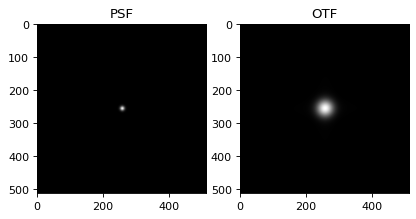

In [19]:
plt.figure(figsize=(6, 4), dpi=80)
plt.subplot(121)
plt.imshow(np.fft.fftshift(h), cmap='gray')
plt.title('PSF')
plt.subplot(122)
plt.imshow(np.fft.fftshift(hf), cmap='gray')
plt.title('OTF')
plt.show()

Compute the blurred image using periodic convolution with FFTs.

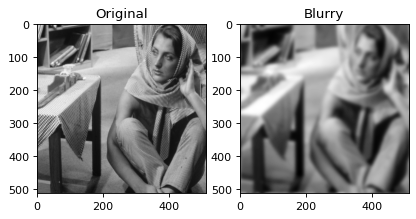

In [11]:
y1_bl = np.real(np.fft.ifft2(hf*np.fft.fft2(x1)))

plt.figure(figsize=(6, 4), dpi=80)
plt.subplot(121)
plt.imshow(x1, cmap='gray')
plt.title('Original')
plt.subplot(122)
plt.imshow(y1_bl, cmap='gray')
plt.title('Blurry')
plt.show()

# 2. Introduction to Inverse Problems

A more realistic model writes
$$
mat(y)=f(mat(x)) + mat(\eta) \qquad (1)
$$
where $mat(\cdot)$ is a notation used in this lab to underline that $f(mat(x))$ is an operation on a matrix $x$. 

A more common notation to write (1) is: 
$$
y= Ax + \eta
$$
where $A$ is the linear transformation and $x$, $y$ and $\eta$ are viewed as vectors. However, when working in image processing the matrix $A$ will rearly be constructed, and we will not reshape the image $x$ as a vector.  It is important, as we have observed in the lab, that even though we use the notations $A$, we do not actually construct the matrix. 

In this lab, we considerer that the noise, $\eta$ follows a multidimensional normal law of covarience $\sigma^2 I$ and of mean the zero vector. So, we can write: $\eta \sim \mathcal{N}(0, \sigma^2 I)$. 
  
The probability density function $p_\eta(\eta)$ is written as: 
\begin{equation}
 p_\eta(\eta) = \frac{1}{(2\pi\sigma^2)^{\frac{N}{2}}} \exp \left(-\frac{\|\eta\|_2^2}{2\sigma^2}\right)
\end{equation}
 where $N$ is the number of pixels and $\|\eta\|_p$ is the $l^p$-norm defined as: 
\begin{equation}
  \|\eta\|_p = \left(\sum_{i=1}^N |\eta|^p\right)^{\frac{1}{p}}
\end{equation}
 
 We want to find the unknown image $x$ from the observation $y$. Therefore, we use the  maximum likelihood estimation which maximizes the likelihood $L(y,x)$ with respect to the unknown image $x$. This likelihood is equal to the conditional probability of $y$ knowing $x$, denoted $p_{y|x}(y|x)$. The probability is calculated from the image model, supposing that the $\eta$ is white Gaussian noise. 

More precisely, the likelihood $L(y,x)$ is given by:
\begin{equation}
 L(y,x) = p_{y|x}(y|x) = p_n(n=Ax - y) = \frac{1}{(2\pi\sigma^2)^{\frac{N}{2}}} \textrm{exp}\left(-\frac{\|Ax-y\|_2^2}{2\sigma^2}\right)
\end{equation}

We search for an estimation $\hat{x}$ of the real image $x$ by maximizing the ligelihood  $L(y,x)$ as follows: 
\begin{equation}
 \hat{x} = \arg\max_x L(y,x)
\end{equation}

In order to avoid the difficulties related to the exponential, we often maximize the logarithm of the likelihood (which does not change the maximum argument since the logarithm is strictly increasing):
\begin{equation}
 \hat{x} = \arg\max_x \, \ln(L(y,x)) = \arg\max_x \, \left(- \ln \left(2\pi\sigma^2 \right)^{\frac{N}{2}} -\frac{1}{2\sigma^2}\|Ax-y\|_2^2\right)
\end{equation}

The term $- \ln \left( 2\pi\sigma^2 \right)^{\frac{N}{2}}$ is a constant with respect to $x$, and thus does not intervene in the estimation of $\arg\max$. Therefore, we can write:
\begin{equation}
 \hat{x} = \arg\max_x \, \left( -\frac{1}{2\sigma^2}\|Ax-y\|_2^2\right)
\end{equation}

The last step removes the proptionality coefficent $\frac{1}{2\sigma^2}$ and the negative sign by using the fact that  $\arg\max_x -f(x) = \arg\min_x f(x)$. So, finally: 

\begin{equation*}
 \hat{x} = \arg\min_x \, \|Ax-y\|_2^2 
\end{equation*}


Denote $J(x)=\|Ax-y\|_2^2 $. This term is in fact the Least Square term associated to the system $y = Ax$. The gradient of $J$ is $\nabla J(x)= 2A^*(Ax-y)$, where $A^*$ is the adjoint operator of A.

__QUESTION__ Find the explicit expression for $\hat{x}$ that satisfies $\nabla J(\hat{x})=0$.

$$ \nabla J(x)=0 \text{ for } x=(A^*A)^{-1}A^*y. $$

## 2.1 Deconvolution Example

Let $y$ be a blured image (without adding any noise). Compute the exact solution $\hat{x}$ that satisfies $\nabla J(\hat{x})=0$, using FFT.

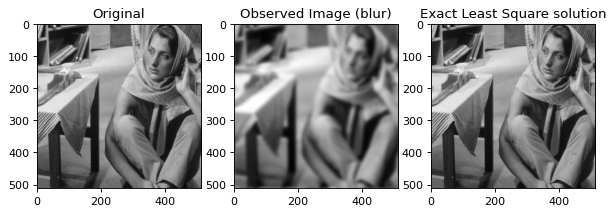

In [12]:
# -- Exact Least Square solution using Fourier
hf_adj = hf.conj()  # H*, H*x  is calculated by ifft2(Hetoile.*fft2(x));
x1sol = np.real(np.fft.ifft2(hf_adj*np.fft.fft2(y1_bl)/(abs(hf)**2)))

plt.figure(figsize=(9, 4), dpi=80)
# plot x
plt.subplot(131)
plt.imshow(x1, cmap='gray')
plt.title('Original')
# plot y
plt.subplot(132)
plt.imshow(y1_bl, cmap='gray')
plt.title('Observed Image (blur)')
# plot xsol
plt.subplot(133)
plt.imshow(x1sol, cmap= 'gray')
plt.title('Exact Least Square solution')
plt.show()

Add white Gaussian noise (not too much) to the blurred image $y$ of the previous question. Compute again the exact solution $\hat{x}$ that satisfies $\nabla J(\hat{x})=0$, using FFT. What do you observe?

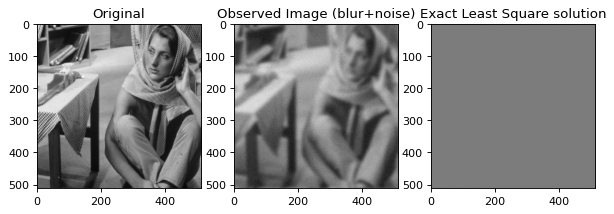

In [13]:
sig = 10                     # SD of Gaussien noise
y1 = y1_bl + sig*np.random.randn(*np.shape(x1))

hf_adj = hf.conj()  # H*, H*x  is calculated by ifft2(Hetoile.*fft2(x));
x1sol = np.real(np.fft.ifft2(hf_adj*np.fft.fft2(y1)/(abs(hf)**2)))

plt.figure(figsize=(9, 4), dpi=80)
# plot x
plt.subplot(131)
plt.imshow(x1, cmap='gray')
plt.title('Original')
# plot y
plt.subplot(132)
plt.imshow(y1, cmap='gray')
plt.title('Observed Image (blur+noise)')
# plot xsol
plt.subplot(133)
plt.imshow(x1sol, cmap='gray')
plt.title('Exact Least Square solution')
plt.show()

#### The importance of Matrix Condition number
The matrix condition number can be calculated, for an $A$ invertible, as 
$$cond(A) = \|A\|\|A^{-1}\|$$
Where $\|A\|= \sup_{x \neq 0} \frac{\|Ax\|}{\|x\|}$.
It can also be calculated  
$$cond(A) = \frac{\lambda_{max}}{\lambda_{min}}$$

If we have $y=Ax$, then $\|y\|\leq \|A\|\|x\|$.
If we have a small pertubation, then 
$y+\delta y = A(x+ \delta x)$, and $\delta y= A \delta x$. Which yields  $\|\delta x\|\leq \|A^{-1}\|\|\delta y\|$.
And thus, 

$$\frac{\|\delta x\|}{\|x\|}\leq\|A\| \|A^{-1}\|\frac{\|\delta y\|}{\|y\|}$$
or, equivalently
$$\frac{\|\delta x\|}{\|x\|}\leq cond(A) \frac{\|\delta y\|}{\|y\|}$$

Why is the Matrix Condition number important ? 
What is the condition number for our problem (remember that the eigen values of $A$ are given by (equal to) the coefficients of the Fourier transform of h)?  Is the problem ill-posed? 

*